# Interpolation

## 1. Bilinear

Links used:
1) https://www.geeksforgeeks.org/what-is-bilinear-interpolation/

In [1]:
import numpy as np

# F -- 2D array of function values
# x1, x2, y1, y2 -- points of known function values
# x, y -- point to interpolate in
def bilinear_interpolation(F, x, y, x1, x2, y1, y2):
    Q11 = F(x1, y1)
    Q12 = F(x1, y2)
    Q21 = F(x2, y1)
    Q22 = F(x2, y2)

    F_int = 1 / (x2 - x1) / (y2 - y1) * ((x2 - x) * (y2 - y) * Q11 + (x - x1) * (y2 - y) * Q21 + (x2 - x) * (y - y1) * Q12 + (x - x1) * (y - y1) * Q22)

    return F_int

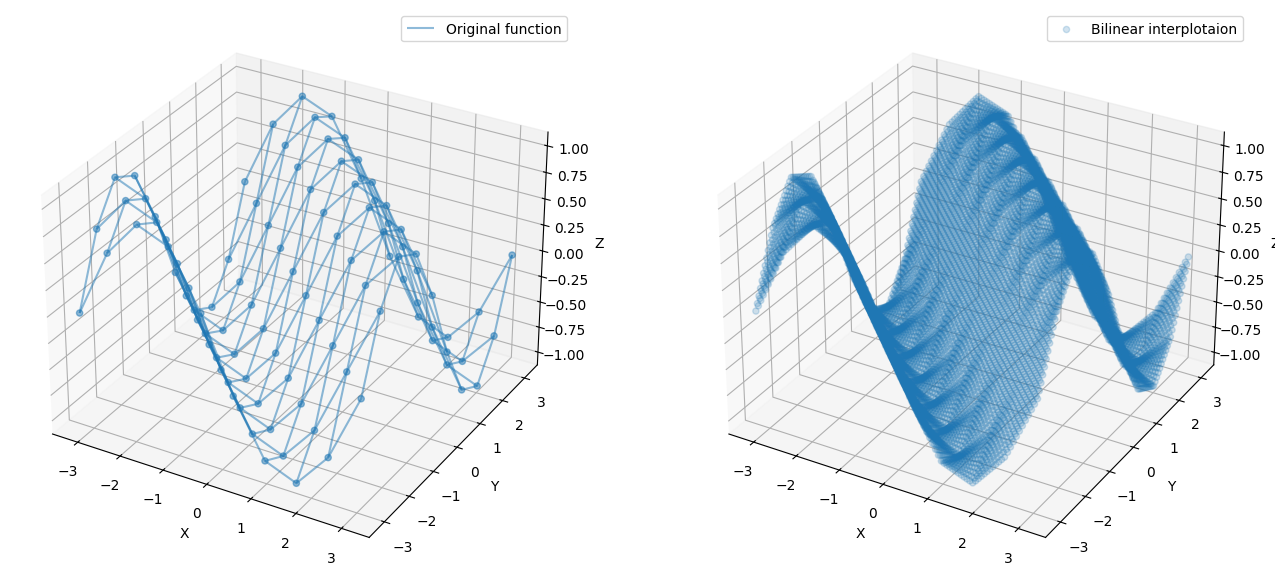

In [37]:
# TEST
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def F(x, y):
    return np.sin(x + y)

def find_closest_values(array, target):
    id = (np.abs(array - target)).argmin()

    if array[id] < target:
        val1 = array[id]
        val2 = array[id + 1]
    else:
        val1 = array[id - 1]
        val2 = array[id]
    
    return val1, val2

x = np.linspace(-np.pi, np.pi, 10)
y = np.linspace(-np.pi, np.pi, 10)
X, Y = np.meshgrid(x, y)
Z = F(X, Y)

arr_x_int = np.linspace(-np.pi + 0.01, np.pi - 0.01, 100)
arr_y_int = np.linspace(-np.pi + 0.01, np.pi - 0.01, 100)
X_int, Y_int = np.meshgrid(arr_x_int, arr_y_int)
Z_int = np.zeros_like(X_int)

for i in range(X_int.shape[0]):
    for j in range(X_int.shape[1]):
        x_int = X_int[i, j]
        y_int = Y_int[i, j]

        x1, x2 = find_closest_values(x, x_int)
        y1, y2 = find_closest_values(y, y_int)

        Z_int[i, j] = bilinear_interpolation(F, x_int, y_int, x1, x2, y1, y2)

fig = plt.figure(figsize=(16, 10))
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_wireframe(X, Y, Z, alpha=0.5, label='Original function')
points1 = ax1.scatter(X, Y, Z, alpha=0.5)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.legend()

ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.scatter(X_int, Y_int, Z_int, alpha=0.2, label='Bilinear interplotaion')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.legend()

plt.show()